

# Calculating $\pi$ using Monte Carlo Methods
---------------------------------------------

# Background 

`Pi` is in fact what mathematicians call an irrational number, meaning that it is a number that can't be written as a simple fraction, or in other words it has an infinite, non-repeating number of decimal digits. Move over 3.14 - here is the value of `Pi` to 100 digits:
 
```
3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679
```
 
If you think that's too much to retain, in October 2015 Suresh Kumar Sharma of India recited 70,030 digits of `Pi` in just over 17 hours.
 
The fact that `Pi` is infinite hasn't stopped mathematicians trying to calculate it to as many digits as possible.  In November 2016, Peter Trueb used some fairly chunky computing power to calculate it to 22,459,157,718,361 decimal places.

In this exercise, we will approximate `Pi` by throwing darts at a dart board using Monte Carlo simulation [Monte Carlo simulation](https://www.ibm.com/cloud/learn/monte-carlo-simulation). Monte Carlo methods employ statistical algorithms to estimate an unknown quantity. For us, this unknown quantity is . The method starts by inscribing a circle inside of a square.


Write a program to create the square and circle and randomly create points that fall within the square. Count the number of points that fall within the circle. Finally, compute the ratio of the number of points in the circle to the total number of points.

![Darts](https://raw.githubusercontent.com/coderefinery/jupyter/main/example/darts.svg)

_Figure. The circle and the square give us our dartboard and back-board respectively, with the circle fitting perfectly inside the square with a radius of 1._


## Methodology

The definition of a circle is a point, called the center, and all the points that are equal distance from the center. Given the center of the circle, use the distance function to test if a random point is inside the circle; that is, the distance from the point to the circle's center is less than the circle’s radius.

- Area of a square: $s_{area} = (2 r)^2$
- Area of the circle: $c_{area} = \pi r^2$
- $c_{area}/s_{area} = (\pi r^2) / (4 r^2) = \pi / 4$
- $\pi = 4 * c/s$

In [1]:
# Importing modules that we will need
import random
import matplotlib.pyplot as plt

In [2]:
# Initializing the number of samples in Monte Carlo simulation (ie. dart throws)
num_points = 1000

In [3]:
# Generate random `x,y` coordinates (ie. the dart throws) and count the number of hits
points = []
hits = 0

# your code here
for _ in range(num_points):
    x, y = random.uniform(-1, 1), random.uniform(-1, 1)
    points.append((x, y))
    if x**2 + y**2 <= 1:
        hits += 1

In [25]:
hits

791

<img src="assets/2022-03-29-08-55-06.png" width="50%">

_Figure: Plot your dart throws using matplotlib simular to that shown in the figure._

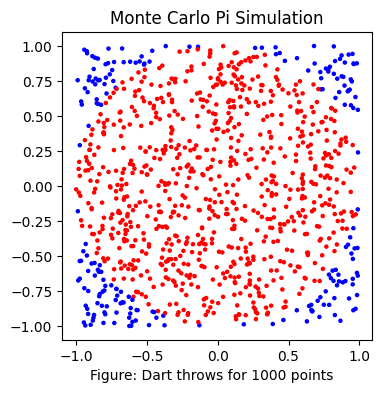

In [4]:
# Plot the points using matplotlib similar to Figure above

# Using list comprehension to get points
xs = [p[0] for p in points]
ys = [p[1] for p in points]

# Plotting
plt.figure(figsize=(4, 4))
plt.scatter(xs, ys, c=['red' if x**2 + y**2 <= 1 else 'blue' for x, y in points], s=5)
txt=f"Figure: Dart throws for {num_points} points"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.title(f"Monte Carlo Pi Simulation")
plt.show()

In [5]:
# Compute pi from your simulation data and print the estimate

# From given equations:
pi_estimate = 4 * hits / num_points
print(f'pi estimate for {num_points} points: ', pi_estimate)

pi estimate for 1000 points:  3.164


# Results

Construct a table (using markdown) to benchmark a series of experiments for `n` number of points. Also, include the time, $t$, (in seconds) that the simulation took to complete. Only include the time needed to simulate the points and estimate $\pi$. Do not include the time to plot the data. Choose point values that help to identify trends with the data.

$n$ points | $t$ (seconds) | value of $\pi$
--- | -- |  :---: 
1 | -  | -
10 | -  | -
100 | -  | -
1000 | -  | -
10000 | -  | -
... | ... | ...

#### Convert Monte Carlo computations to a function for reusability

In [17]:
def monte_carlo_pi(num_points):
    '''Function to perform Monte Carlo simulation for Pi estimation

        Input: num_points (int), number of points in simulation
        Output: pi_estimate (double), points (int): estimated pi and x,y coordinates
    '''
    hits = 0
    points = []

    # Generate points and count hits within the circle
    for _ in range(num_points):
        x, y = random.uniform(-1, 1), random.uniform(-1, 1)
        points.append((x, y))
        if x**2 + y**2 <= 1:
            hits += 1

    pi_estimate = 4 * hits / num_points
    return pi_estimate, points

In [23]:
def plot_circle(points, num_points):
    '''Function to plot the simulation

        Input: points, num_points:
    '''

    # Plot for the last experiment with 10,000 points
    x_vals = [p[0] for p in points]
    y_vals = [p[1] for p in points]
    
    plt.figure(figsize=(4, 4))
    plt.scatter(x_vals, y_vals, c=['red' if x**2 + y**2 <= 1 else 'blue' for x, y in points], s=1)
    txt=f"Figure: Dart throws for {num_points} points"
    plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=10)
    plt.show()


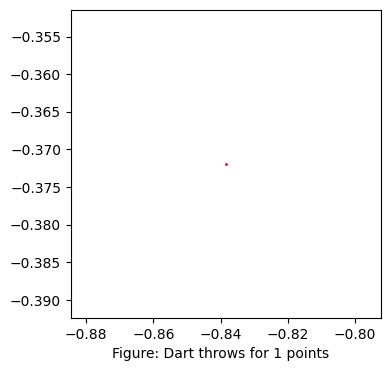

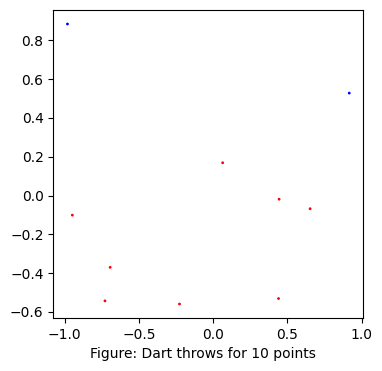

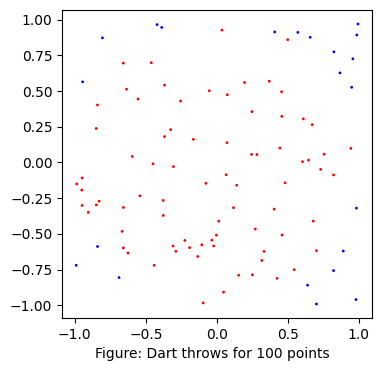

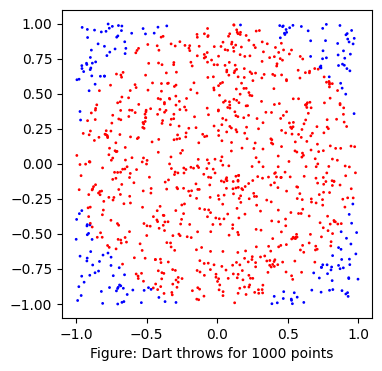

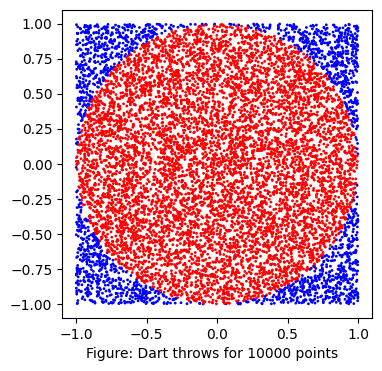

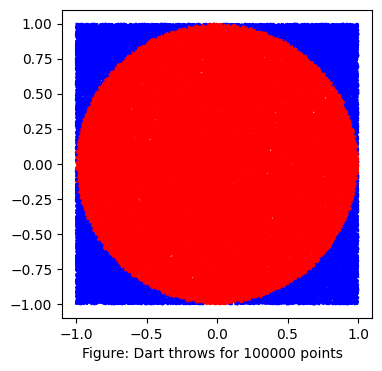

In [24]:
import time
import pandas as pd

point_experiments = [1, 10, 100, 1000, 10000, 100000]

# BenchmarkingX
results = []
for num_points in point_experiments:
    start_time = time.time()
    pi_estimate, points = monte_carlo_pi(num_points)
    elapsed_time = time.time() - start_time
    plot_circle(points, num_points)
    results.append([num_points, elapsed_time, pi_estimate])

In [22]:
results_df = pd.DataFrame(results, columns=["n points", "t (seconds)", "value of pi"])


In [16]:
results_df

,n points,t (seconds),value of pi
0,1,0.002629,4.00000
1,10,0.000008,3.20000
2,100,0.000040,3.24000
3,1000,0.000320,3.12000
4,10000,0.003346,3.15320
5,100000,0.033543,3.14284


# Conclusion 

Please answer the foolowing questions:

* Considering the numeric types used in this calculation, what is the actual accuracy of this calculation?
* Given your implementation, approximate how long it would take to compute $\pi$ to 70,030 digits. 


In Latex